In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("knn_telecom.csv")
df = df.loc[:, ~df.columns.str.lower().str.contains("id")]
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}
K= {k} | CV Accuracy {round(score,4)}

Best K Selected: 3


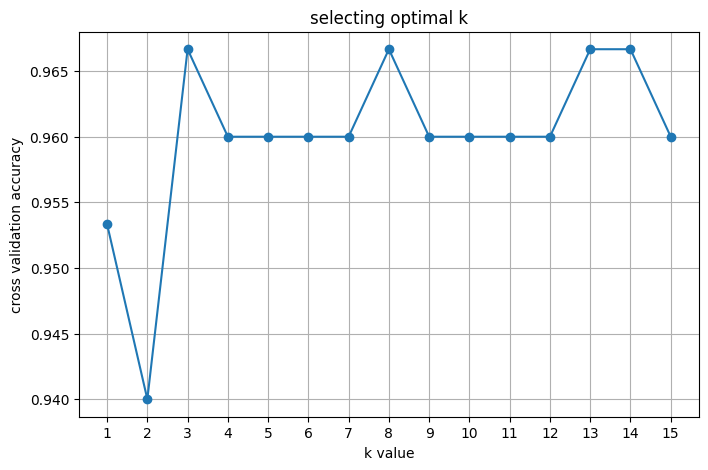


User Input:
   Age Gender PlanType  Tenure  MonthlyUsage
0   40   Male  Premium      12           350

Predicted Churn: 1
Predction Probility: [0. 1.]


In [12]:

X = df.drop("Churn", axis=1)
y = df["Churn"]


numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns


preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ]
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
k_values=range(1,16)
cv_scores=[]
for k in k_values:
    model = Pipeline([
        ("preprocessing", preprocessor),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    cv_scores.append(scores.mean())

# Display results
for k, score in zip(k_values, cv_scores):
    print("K= {k} | CV Accuracy {round(score,4)}")

best_k = k_values[np.argmax(cv_scores)]
print("\nBest K Selected:", best_k)

plt.figure(figsize=(8,5))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel("k value")
plt.ylabel("cross validation accuracy")
plt.title("selecting optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

final_model= Pipeline([
    ("preprocessing",preprocessor),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
final_model.fit(X,y)

user_data={
    "Age":40,
    "Gender":"Male",
    "PlanType": "Premium",
    "Tenure": 12,
    "MonthlyUsage": 350
}
user_df = pd.DataFrame([user_data])
prediction = final_model.predict(user_df)[0]
probability = final_model.predict_proba(user_df)[0]
print("\nUser Input:")
print(user_df)
print("\nPredicted Churn:", prediction)
print("Predction Probility:",probability)

